In [41]:
import random
import numpy as np
from numpy.random.mtrand import randint
from scipy.stats import multivariate_normal
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import math
from scipy.special import gamma
from scipy.special import gamma
from sklearn.linear_model import LogisticRegression
import random
from sklearn.model_selection import cross_val_score

In [2]:

df = pd.read_csv("LymphomaCancer.csv")
df.replace("?",0)
# df.head()
# # df.columns

,GENE1835X,GENE1836X,GENE1865X,GENE1380X,GENE1933X,GENE1932X,GENE1931X,GENE1930X,GENE3129X,GENE3126X,...,GENE3931X,GENE2588X,GENE3120X,GENE6X,GENE5X,GENE3X,GENE2X,GENE48X,GENE47X,CLASS
0,0.46,0.7,0.67,-0.23,0,0.09,-0.02,-0.57,-0.17,-0.25,...,0.4,0.02,0.79,0.64,0.16,1.22,1.37,-0.04,0.16,DLBCL
1,0.02,0.59,0.45,0.55,-0.08,-0.15,-0.05,-0.38,-0.55,0.35,...,0.57,0.52,-0.23,0.3,0.09,-0.2,-0.05,-0.14,-1.15,DLBCL
2,-0.32,-0.63,-0.46,-0.28,-0.96,-1.17,-1.13,-0.89,-0.49,-0.23,...,1.62,-0.01,0,0.29,-0.57,1.2,1.4,0.29,0.25,DLBCL
3,-0.51,-0.45,-0.16,-0.51,-0.58,-0.71,-0.65,-0.82,-0.30,-0.22,...,0.34,0.02,0.08,0.49,0.29,1.26,1.24,0.05,0.7,DLBCL
4,0.2,0.13,0.2,0.09,-0.56,0,0.06,-0.15,-0.61,-0.65,...,0.16,0.66,1.11,0.28,0.12,-0.16,-0.72,-0.04,-0.22,DLBCL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.77,0,0.8,-0.13,0.52,-0.58,-0.44,0.25,0.15,0,...,-0.37,0,0,0,-0.52,0,0,-0.86,0,CLL
62,-0.03,-0.38,0.01,0.29,-0.11,-0.13,-0.36,0.46,0.19,-0.05,...,-0.23,-0.19,-0.85,-1,-0.89,-1.79,-1.56,-0.26,1.04,CLL
63,0.09,0,0.85,0.55,0.3,0.3,0.16,0.34,0.90,0.85,...,0.09,-0.46,-0.14,0,-0.83,0,0,0.09,-0.53,CLL
64,0.34,0,0.36,0.11,0.15,0.19,-0.11,0.27,0.59,0.55,...,0.41,0,0,-0.42,-0.25,0,0,-0.33,0,CLL


In [16]:
bin_len = int(math.log(len(df.columns),2)+1)
# encode labels column to numbers
le = LabelEncoder()
le.fit(df.iloc[:, -1])
y = le.transform(df.iloc[:, -1])
X = df.iloc[:, :-1]
# X_train, X_test, y_train, y_test=train_test_split(X,
#                                                   y,
#                                                   test_size=0.25,
#                                                   random_state=42)
nests_size = 100
Pa = 0.25
iterNumb = 10
sigma = 0
individual_size = len(df.columns)

In [39]:
def avg(l):
    """
    Returns the average between list elements
    """
    return (sum(l)/float(len(l)))
def meanPoint(x,val):
    mean=0
    for i in range(len(x)):
        mean= x[i]*val[i]
    
    mean = mean/sum(val)
    return mean

In [53]:
class cuckoo:

    def __init__(self, populationSize, probability, iterations, individual_size):
        self.nestNumb = populationSize
        self.Pa = probability
        self.iterNumb = iterations
        self.nests = []
        self.individual_size = individual_size
        
    def fitness(self,individual): #x = (x,y)
#         mean = np.array([0,0])
#         cov = np.array([[0.1,0 ], [0,0.1]])
#         ans = multivariate_normal.pdf(x, mean, cov)
#         return pow((pow((x[0] - 3), 2) +pow((x[1] - 4), 2)), 2)


#    Feature subset fitness function

        individual = str(individual)
        if(individual.count('0') != len(individual)):
            # get index with value 0
            cols = [index for index in range(len(individual)) if individual[index] == 0]
            # get features subset
            X_parsed = X.drop(X.columns[cols], axis=1)
            X_subset = pd.get_dummies(X_parsed)
            # apply classification algorithm
            clf = LogisticRegression()

            return avg(cross_val_score(clf, X_subset, y, cv=5))
        else:
            return 0
                
        
    def generate(self):

        individual = []
        for j in range(self.individual_size):
            a = random.random()
            if a<0.5:
                individual.append(0)
            else:
                individual.append(1)

        return np.array(individual)
#!!!!
    def LevyFlight(self,individual):
        x = individual
        y = []
        beta = 3/2
        alpha_u = math.pow((gamma(1+beta)*math.sin(math.pi*beta/2)/(gamma( ((1+beta)/2)*beta*math.pow(2,(beta-1)/2)) ) ),(1/beta))
        alpha_v = 1
        for t in x:
            u = np.random.normal(0,alpha_u,1)
            v = np.random.normal(0,alpha_v,1)
            step = u / math.pow(abs(v),(1/beta))
            if(step>sigma):
                y.append(1)
            else:
                y.append(0)

        return np.array(y)
        
    def abandonWorst(self, nest):
        for i in range(len(nest)-int(self.Pa*len(nest)),len(nest)): # Pa of worst solutions
            buf = self.generate() #generate new nests
            val = self.fitness(buf)   #evaluate new nests
            nest[i] = [buf,val] #swap
        return nest
    
    def run(self):
        print("1")
        # generate random nests
        for i in range(self.nestNumb):
            
            buf = self.generate()
            
            self.nests.append((buf, self.fitness(buf)))
            
         #start iteration
        for step in range(self.iterNumb):
#             if (step%50 == 0):
            print("iteration\t",step)
                
            i = randint(0,self.nestNumb) #chose random nest
            cuckoo = self.LevyFlight(self.nests[i][0]) #get random cuckoo and make him levy's flight
            Fcuckoo = self.fitness(cuckoo) #evaluate cuckoo
            
            jnest = randint(0,len(self.nests)) #nest chosen by cuckoo
            
            if(Fcuckoo > self.nests[jnest][1]):
                self.nests[jnest] = [cuckoo, Fcuckoo] #replace new solution
                

            self.nests.sort(key=lambda val: val[1], reverse=True) #best solutions at start of list
            self.nests = self.abandonWorst(self.nests)
            self.nests.sort(key=lambda val: val[1], reverse=True)
            
        return self.nests 
CS  = cuckoo(nests_size, Pa, iterNumb,individual_size)
nests = CS.run()

1
iteration	 0
iteration	 1
iteration	 2
iteration	 3
iteration	 4
iteration	 5
iteration	 6
iteration	 7
iteration	 8
iteration	 9


# Levy Flight

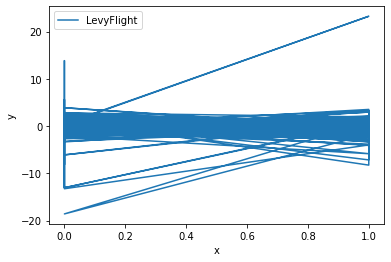

In [64]:
import math
import numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt
import torch
from visdom import Visdom

x = individual
y = []
beta = 3/2
alpha_u = math.pow((gamma(1+beta)*math.sin(math.pi*beta/2)/(gamma( ((1+beta)/2)*beta*math.pow(2,(beta-1)/2)) ) ),(1/beta))
alpha_v = 1
for t in x:
    u = np.random.normal(0,alpha_u,1)
    v = np.random.normal(0,alpha_v,1)
    step = u / math.pow(abs(v),(1/beta))

    y.append(step)

plt.plot(x, y, label="LevyFlight")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


